In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import matplotlib.dates as dates
%matplotlib inline

In [2]:
DATA = []
DATA.append(pd.read_csv('AIRTEL.csv'))
DATA.append(pd.read_csv('TCS.csv'))
DATA.append(pd.read_csv('TATASTL.csv'))
DATA.append(pd.read_csv('REL.csv'))
DATA.append(pd.read_csv('BAJAJ.csv'))

In [3]:
def mav(y,a):
    mov_avg = 0.0
    avg = []
    for i in range(a-1):
        mov_avg+=y[i]
        avg.append(0)
    for i in range(a-1,len(y)):
        if i == (a-1):
            mov_avg += y[i]
        else:
            mov_avg += (y[i] - y[i-a])
        avg.append(mov_avg/float(a))
        #print(mov_avg/float(a))
    return avg

def emav(y,a,b):
    mov_avg = 0.0
    mult = b/(a + 1)
    avg = []
    for i in range(a-1):
        mov_avg+=y[i]
        avg.append(0)
    for i in range(a-1,len(y)):
        if i == (a-1):
            mov_avg += y[i]
            mov_avg = mov_avg*mult
        else:
            mov_avg = (y[i] - avg[i-1])*mult + avg[i-1] 
        avg.append(mov_avg)
        #print(mov_avg/float(a))
    return avg

def wmav(y,a,b):
    avg = []
    for i in range(a-1):
        avg.append(0)
    for i in range(a-1,len(y)):
        mov_avg = 0.0
        for j in range(a):
            mov_avg += y[i-j]*b[j]
        avg.append(mov_avg/float(a))
        #print(mov_avg/float(a))
    return avg 
def doubleCross(a,b,y):
    y1 = mav(y,a)
    y2 = mav(y,b)
    asset = 1000000
    stock = 0
    eval= [0]*len(y)
    for i in range(20,len(y)):
        if y1[i] > y2[i] and (asset-y[i]) >=0 :
            stock+=1
            asset-=y[i]
        elif y1[i] < y2[i] and stock >0:
            stock-=1
            asset+=y[i]
        eval[i] = (stock*y[i] + asset)
    profit = (stock*y[len(y)-1] + asset)
    return eval,profit

def trippleCross(a,b,c,y):
    y1 = mav(y,a)
    y2 = mav(y,b)
    y3 = mav(y,c)
    asset = 1000000
    stock = 0
    eval= [0]*len(y)
    for i in range(20,len(y)):
        if y1[i] < y3[i] and y3[i] > y2[i] and y2[i] > y1[i] and stock >0:
            stock-=1
            asset+=y[i]
        elif y1[i] > y2[i] and y1[i] > y3[i] and y2[i] > y3[i] and  (asset-y[i]) >=0:
            stock+=1
            asset-=y[i]
        eval[i] = (stock*y[i] + asset)
    profit = stock*y[len(y)-1] + asset
    return eval,profit

def expoTrippleCross(a1,a2,b1,b2,c,y):
    y1 = emav(y,a1,a2)
    y2 = emav(y,b1,b2)
    y3 = mav(y,c)
    asset = 1000000
    stock = 0
    eval= [0]*len(y)
    for i in range(20,len(y)):
        if y1[i] < y3[i] and y3[i] > y2[i] and y2[i] > y1[i] and stock >0 :
            stock-=1
            asset+=y[i]
        elif y1[i] > y2[i] and y1[i] > y3[i] and y2[i] > y3[i] and (asset-y[i]) >=0:
            stock+=1
            asset-=y[i]
        eval[i] = (stock*y[i] + asset)
    profit = stock*y[len(y)-1] + asset
    return eval,profit

def MACD(a1,a2,b1,b2,c1,c2,y):
    y1 = emav(y,a1,a2)
    y2 = emav(y,b1,b2)
    y3 = [0]*len(y1)
    for i in range(len(y1)):
        y3[i] = y1[i] - y2[i]
    y4 = emav(y3,c1,c2)
    histo = [0]*len(y2)
    for i in range(len(y3)):
        histo[i] = y3[i] - y4[i]
    
    asset = 1000000
    stock = 0
    eval= [0]*len(y)
    for i in range(20,len(y)):
        if y3[i] > y4[i] and (asset-y[i]) >=0 :
            stock+=1
            asset-=y[i]
        elif y3[i] < y4[i] and stock >0:
            stock-=1
            asset+=y[i]
        eval[i] = (stock*y[i] + asset)
        
    profit = stock*y[len(y)-1] + asset
    return eval,y3,y4,histo,profit

/usr/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


991031.5500000013 993372.7499999999 990899.75 1001388.4500000016
1167971.7000000002 1151393.8499999999 1163545.9499999997 1089941.3999999994
1011931.3499999981 1011621.1999999996 1006350.5999999994 1003369.6999999993
947758.3500000015 952988.7500000006 942544.0000000006 983347.3500000023
1055738.4500000016 1055572.1 1068050.6000000015 1083523.1500000015


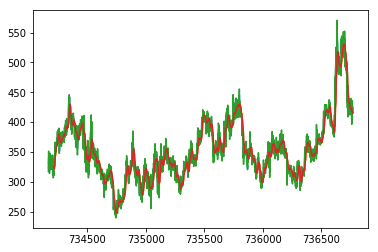

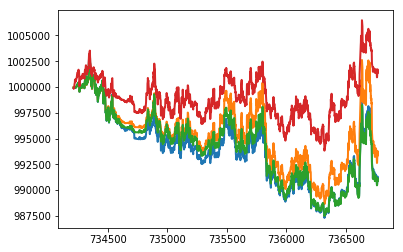

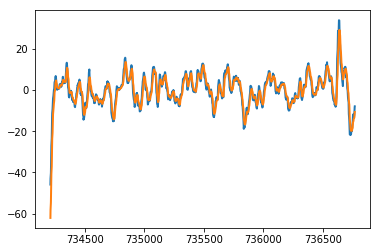

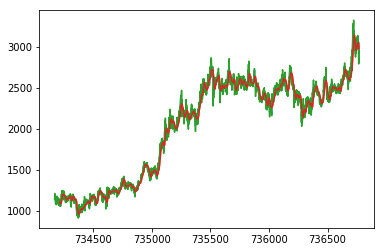

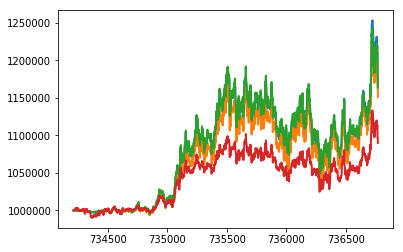

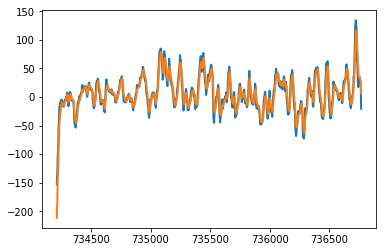

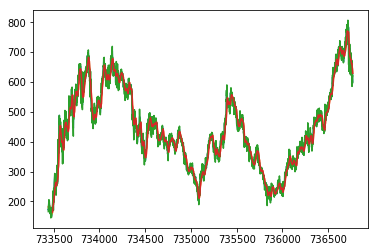

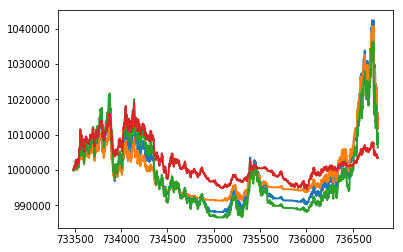

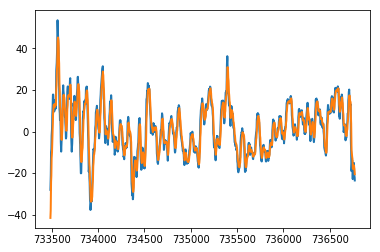

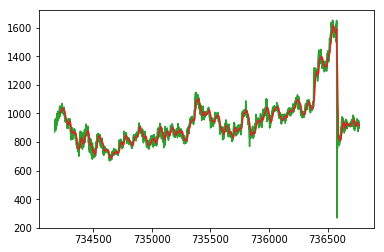

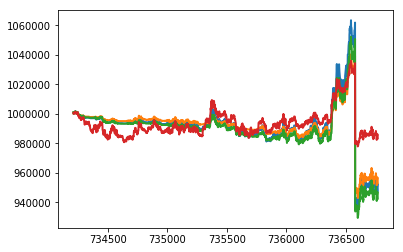

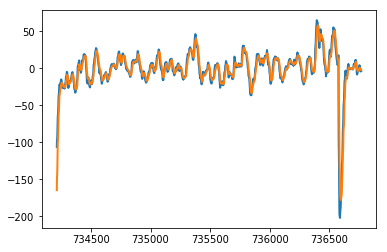

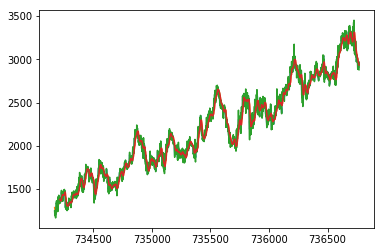

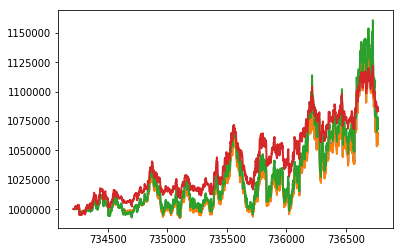

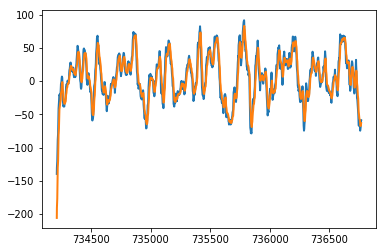

In [4]:

i = 1
for data in DATA: 
    x = []
    y = []
    for i in data['Date']:
        x.append(i)
    for i in data['Close Price']:
        y.append(i)
    new_x = dates.datestr2num(x)
    plt.figure(i)
    new_y = mav(y,10)
    emv = emav(y,2,5)
    wav = wmav(y,5,[1,1,1,1,1])
    plt.subplot(111)
    plt.plot(new_x[20:],y[20:])
    plt.subplot(111)
    plt.plot(new_x[20:],new_y[20:])
    plt.subplot(111)
    plt.plot(new_x[20:],emv[20:])
    plt.subplot(111)
    plt.plot(new_x[51:],new_y[51:])
    i+=1
    y1 = mav(y,5)
    y2 = mav(y,15)
    tp,profit = doubleCross(5,15,y)
    tp1,profit1 = trippleCross(5,10,15,y)
    tp2,profit2 = expoTrippleCross(5,2,10,3,15,y)
    tp3,macdl,signal,histo,profit3 = MACD(12,2,26,2,9,2,y)
    print(profit,profit1,profit2,profit3)
    plt.figure(i)
    plt.subplot(111)
    plt.plot(new_x[51:],tp[51:], linewidth=2.0)
    plt.subplot(111)
    plt.plot(new_x[51:],tp1[51:], linewidth=2.0)
    plt.subplot(111)
    plt.plot(new_x[51:],tp2[51:], linewidth=2.0)
    plt.subplot(111)
    plt.plot(new_x[51:],tp3[51:], linewidth=2.0)
    i+=1
    plt.figure(i)
    plt.subplot(111)
    plt.plot(new_x[51:],macdl[51:], linewidth=2.0)
    plt.subplot(111)
    plt.plot(new_x[51:],signal[51:], linewidth=2.0)
    plt.subplot(111)

In [5]:
# from keras.layers import Input, Dense
# from keras.models import Model
import nn
import numpy as np
from random import uniform
from tqdm import tqdm_notebook as tqdm

In [6]:
# def c_enc_dec(inp_dim, sec_dim):
#     inp_l = Input(shape=(inp_dim,))
#     en_l1 = Dense(sec_dim, activation='sigmoid')(inp_l)
#     en_l2 = Dense(1, activation='sigmoid')(en_l1)
#     dc_l1 = Dense(sec_dim, activation='sigmoid')(en_l2)
#     dc_l2 = Dense(inp_dim, activation='sigmoid')(dc_l1)
    
#     nn1 = Model(inp_l, en_l2)
#     nn2 = Model(inp_l, dc_l2)
    
#     return nn1, nn2


# def train_step(nn1, nn2, x, y):
#     nn1.compile(optimizer='adam', loss='binary_crossentropy')
#     nn1.fit(x=x, y=y, verbose=0)
    
#     nn2.layers[-3].trainable = False
#     nn2.layers[-4].trainable = False
    
#     nn2.compile(optimizer='adam', loss='binary_crossentropy')
#     nn2.fit(x=x, y=x, verbose=0)
    
#     return nn1, nn2


# def get_paramaters(nn2):
#     inp_l = Input(shape=(1,))
#     dc_l1 = Dense(nn2.layers[1].output_shape, activation='sigmoid')(inp_1)
#     dc_l2 = Dense(nn2.layers[0].output_shape, activation='sigmoid')(dc_l1)
    
#     dc_l1.set_weights(nn2.layers[-2].get_weights())
#     dc_l2.set_weights(nn2.layers[-1].get_weights())
    
#     return dc_l2.predict([1.0])

In [7]:
n_samples = 1000

y = []
for i in DATA[4]['Close Price']:
    y.append(i)

In [8]:
dc_nn = nn.NeuralNetwork(2, 3)
asset = 1000000
max_profit = 1000000
max_loss = 1000000
for spl in tqdm(range(n_samples)):
    b = uniform(0.02, 0.5)
    a = uniform(0.02, b)
    _, profit = doubleCross(int(a*100),int(b*100), y)
    if profit >= asset:
        t_profit = profit - asset
        max_profit = max(max_profit, profit)
        if max_profit == asset:
            ml_y = 0.5
        else:
            ml_y = 0.5 + (t_profit)/(max_profit - asset)
    else:
        t_loss = asset - profit
        max_loss = min(max_loss, profit)
        if max_profit == asset:
            ml_y = 0.5
        else:
            ml_y = 0.5 - (t_loss)/(asset - max_loss)
        
    dc_nn.fit1(np.array([a,b]), np.array([ml_y]))

dc_pred = dc_nn.predict()
_, profit = doubleCross(int(dc_pred[0][0]*100), int(dc_pred[0][1]*100), y)
print("Best Parameters : ", int(dc_pred[0][0]*100), int(dc_pred[0][1]*100))
print("Profit : ", profit)


Best Parameters :  16 29
Profit :  1059640.6000000031


In [9]:
tc_nn = nn.NeuralNetwork(3, 5)
asset = 1000000
max_profit = 1000000
max_loss = 1000000
for spl in tqdm(range(n_samples)):
    c = uniform(0.02, 0.5)
    b = uniform(0.02, c)
    a = uniform(0.02, b)
    _, profit = trippleCross(int(a*100),int(b*100),int(c*100),y)
    if profit >= asset:
        t_profit = profit - asset
        max_profit = max(max_profit, profit)
        if max_profit == asset:
            ml_y = 0.5
        else:
            ml_y = 0.5 + (t_profit)/(max_profit - asset)
    else:
        t_loss = asset - profit
        max_loss = min(max_loss, profit)
        if max_profit == asset:
            ml_y = 0.5
        else:
            ml_y = 0.5 - (t_loss)/(asset - max_loss)
        
    tc_nn.fit1(np.array([a,b,c]), np.array([ml_y]))

tc_pred = tc_nn.predict()
_, profit = trippleCross(int(tc_pred[0][0]*100), int(tc_pred[0][1]*100), int(tc_pred[0][2]*100), y)
print("Best Parameters : ", int(tc_pred[0][0]*100), int(tc_pred[0][1]*100), int(tc_pred[0][2]*100))
print("Profit : ", profit)


Best Parameters :  8 16 28
Profit :  1062070.0500000024


In [10]:
etc_nn = nn.NeuralNetwork(5, 7)
asset = 1000000
max_profit = 1000000
max_loss = 1000000
for spl in tqdm(range(n_samples)):
    c = uniform(0.02, 0.5)
    b1 = uniform(0.02, c)
    b2 = uniform(0.02, b1)
    a1 = uniform(0.02, b1)
    a2 = uniform(0.02, a1)
    _, profit = expoTrippleCross(int(a1*100),int(a2*100),int(b1*100), int(b2*100), int(c*100), y)
    if profit >= asset:
        t_profit = profit - asset
        max_profit = max(max_profit, profit)
        if max_profit == asset:
            ml_y = 0.5
        else:
            ml_y = 0.5 + (t_profit)/(max_profit - asset)
    else:
        t_loss = asset - profit
        max_loss = min(max_loss, profit)
        if max_profit == asset:
            ml_y = 0.5
        else:
            ml_y = 0.5 - (t_loss)/(asset - max_loss)
            
    etc_nn.fit1(np.array([a1, a2, b1, b2, c]), np.array([ml_y]))

etc_pred = etc_nn.predict()
_, profit = expoTrippleCross(int(etc_pred[0][0]*100), int(etc_pred[0][1]*100), int(etc_pred[0][2]*100), 
                             int(etc_pred[0][3]*100), int(etc_pred[0][4]*100), y)
print("Best Parameters : ", int(etc_pred[0][0]*100), int(etc_pred[0][1]*100), int(etc_pred[0][2]*100),
                             int(etc_pred[0][3]*100), int(etc_pred[0][4]*100))
print("Profit : ", profit)


Best Parameters :  6 4 14 7 26
Profit :  1069123.9000000013
